In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv("datasets_483_982_spam.csv", encoding='latin-1')
data.dropna(how="any", inplace=True, axis=1)
data.rename(columns = {"v1":"label", "v2":"raw text"}, inplace = True)
data.head()

,label,raw text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.isna().sum()

label       0
raw text    0
dtype: int64

In [4]:
data.shape

(5572, 2)

Make all the email lower case.

In [5]:
data['raw text'] = data['raw text'].str.lower()

In [6]:
data.head()

,label,raw text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


Create a new column that maps ham with 0 and spam with 1

In [7]:
spam = []
for elem in np.arange(len(data)):
    if data['label'][elem] == 'ham':
        spam.append(0)
    else:
        spam.append(1)
data['spam'] = spam

In [8]:
data.head()

,label,raw text,spam
0,ham,"go until jurong point, crazy.. available only ...",0
1,ham,ok lar... joking wif u oni...,0
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1
3,ham,u dun say so early hor... u c already then say...,0
4,ham,"nah i don't think he goes to usf, he lives aro...",0


Create another column that has the length of the email.

In [9]:
email_len = []
for elem in np.arange(len(data)):
    email_len.append(len(data['raw text'][elem]))
data['length'] = email_len
data.head()

,label,raw text,spam,length
0,ham,"go until jurong point, crazy.. available only ...",0,111
1,ham,ok lar... joking wif u oni...,0,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1,155
3,ham,u dun say so early hor... u c already then say...,0,49
4,ham,"nah i don't think he goes to usf, he lives aro...",0,61


Now let's split the data into train and test.

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.1, random_state=42)

In [11]:
train.head()

,label,raw text,spam,length
3130,spam,lookatme!: thanks for your purchase of a video...,1,156
106,ham,"aight, i'll hit you up when i get some cash",0,43
4697,ham,don no da:)whats you plan?,0,26
856,ham,going to take your babe out ?,0,29
3454,ham,no need lar. jus testing e phone card. dunno n...,0,158


In [12]:
test.head()

,label,raw text,spam,length
3245,ham,"funny fact nobody teaches volcanoes 2 erupt, t...",0,151
944,ham,i sent my scores to sophas and i had to do sec...,0,221
1044,spam,we know someone who you know that fancies you....,1,101
2484,ham,only if you promise your getting out as soon a...,0,124
812,spam,congratulations ur awarded either å£500 of cd ...,1,150


Visualize the length of spam and ham emails.

In [13]:
ham = train[train['label'] == 'ham']
ham.head()

,label,raw text,spam,length
106,ham,"aight, i'll hit you up when i get some cash",0,43
4697,ham,don no da:)whats you plan?,0,26
856,ham,going to take your babe out ?,0,29
3454,ham,no need lar. jus testing e phone card. dunno n...,0,158
2095,ham,"probably, want to pick up more?",0,31


In [14]:
spam = train[train['label'] == 'spam']
spam.head()

,label,raw text,spam,length
3130,spam,lookatme!: thanks for your purchase of a video...,1,156
800,spam,last chance! claim ur å£150 worth of discount ...,1,154
4806,spam,private! your 2004 account statement for 07849...,1,153
1117,spam,"449050000301 you have won a å£2,000 price! to ...",1,70
4110,spam,urgent! your mobile number has been awarded a ...,1,141


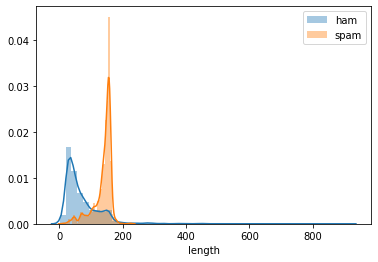

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(ham['length'], label = 'ham');
sns.distplot(spam['length'], label = 'spam');
plt.legend();

From the visualization, it appears that spam emails tend to be longer. It might also be a good idea to visualize certain words and see whether they occur more frequently in spam or ham.

In [16]:
def words_in_texts(words, texts):
    texts_len = len(texts)
    words_len = len(words)
    new_array = []
    
    for num in range(words_len):
        new_array.append(texts.str.contains(words[num], regex = False).values)
    
    indicator_array = np.array(new_array).T.astype(int)
    return indicator_array

In [17]:
words = ['body', 'business', 'html', 'money', 'offer', 'free']
zero_ones = words_in_texts(words, train['raw text'])
zero_ones

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [18]:
body_list = zero_ones[:, 0]
business_list = zero_ones[:, 1]
html_list = zero_ones[:, 2]
money_list = zero_ones[:, 3]
offer_list = zero_ones[:, 4]
free_list = zero_ones[:, 5]


data0 = {'body' : body_list, 'business' : business_list, 'html' : html_list, 'money' : money_list, 'offer' : offer_list, 
         'free' : free_list, 'label' : train['label']}

new_dataframe = pd.DataFrame(data = data0)
new_dataframe.head()

,body,business,html,money,offer,free,label
3130,0,0,0,0,0,0,spam
106,0,0,0,0,0,0,ham
4697,0,0,0,0,0,0,ham
856,0,0,0,0,0,0,ham
3454,0,0,0,0,0,0,ham


In [19]:
final_dataframe = new_dataframe.melt('label').groupby(['variable', 'label']).mean()
final_dataframe = final_dataframe.reset_index()
final_dataframe

,variable,label,value
0,body,ham,0.006922
1,body,spam,0.002941
2,business,ham,0.000461
3,business,spam,0.000000
4,free,ham,0.014075
5,free,spam,0.270588
6,html,ham,0.000000
7,html,spam,0.001471
8,money,ham,0.011767
9,money,spam,0.004412


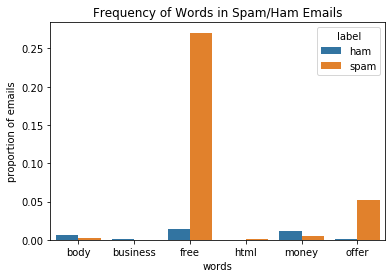

In [20]:
sns.barplot(x = 'variable', y = 'value', hue = 'label', data = final_dataframe);
plt.title('Frequency of Words in Spam/Ham Emails')
plt.xlabel('words')
plt.ylabel('proportion of emails')
plt.show()

We should choose better words but two of the words that appear more frequently in spam are "free" and "offer".

In [21]:
train.head()

,label,raw text,spam,length
3130,spam,lookatme!: thanks for your purchase of a video...,1,156
106,ham,"aight, i'll hit you up when i get some cash",0,43
4697,ham,don no da:)whats you plan?,0,26
856,ham,going to take your babe out ?,0,29
3454,ham,no need lar. jus testing e phone card. dunno n...,0,158


Can now train a classifier

In [22]:
some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['raw text'])
Y_train = np.array(train['spam'])

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]),
 array([1, 0, 0, 0, 0]))

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(fit_intercept = True)
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train,Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.867171918627842


Although are accuracy is fairly good, let's measure it by calculating the model's precision, recall, and false positive rate.

In [24]:
Y_train_hat = model.predict(X_train)

true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
length_y = np.arange(len(Y_train_hat))

for index in length_y:
    if (Y_train[index] == 1) and (Y_train[index] == Y_train_hat[index]):
        true_positive += 1
    if (Y_train[index] == 0) and (Y_train[index] == Y_train_hat[index]):
        true_negative += 1
    if (Y_train[index] == 1) and (Y_train[index] != Y_train_hat[index]):
        false_negative += 1
    if (Y_train[index] == 0) and (Y_train[index] != Y_train_hat[index]):
        false_positive += 1

logistic_predictor_precision = true_positive / (true_positive + false_positive)
logistic_predictor_recall = true_positive / (true_positive + false_negative)
logistic_predictor_far = false_positive / (false_positive + true_negative)

print("Precision: " + str(logistic_predictor_precision))
print("Recall: " + str(logistic_predictor_recall))
print("False-alarm rate: " + str(logistic_predictor_far))

Precision: 0.9375
Recall: 0.022058823529411766
False-alarm rate: 0.00023073373327180433


Our recall is pretty terrible. Our precision score and false-alarm rate is fine. Thus, we need to improve our model and we can do so by choosing better and more words. Let's start off by seeing what are the most common words in the spam raw text.

In [25]:
spam.reset_index(inplace = True)
spam.head()

,index,label,raw text,spam,length
0,3130,spam,lookatme!: thanks for your purchase of a video...,1,156
1,800,spam,last chance! claim ur å£150 worth of discount ...,1,154
2,4806,spam,private! your 2004 account statement for 07849...,1,153
3,1117,spam,"449050000301 you have won a å£2,000 price! to ...",1,70
4,4110,spam,urgent! your mobile number has been awarded a ...,1,141


In [26]:
from collections import Counter 
all_strings = ''

for elem in np.arange(len(spam)):
    curr_string = spam['raw text'][elem]
    all_strings = all_strings + ' ' + curr_string
    
all_strings

' lookatme!: thanks for your purchase of a video clip from lookatme!, you\'ve been charged 35p. think you can do better? why not send a video in a mmsto 32323. last chance! claim ur å£150 worth of discount vouchers today! text shop to 85023 now! savamob, offers mobile! t cs savamob pobox84, m263uz. å£3.00 sub. 16 private! your 2004 account statement for 078498****7 shows 786 unredeemed bonus points. to claim call 08719180219 identifier code: 45239 expires 06.05.05 449050000301 you have won a å£2,000 price! to claim, call 09050000301. urgent! your mobile number has been awarded a <ukp>2000 prize guaranteed. call 09061790125 from landline. claim 3030. valid 12hrs only 150ppm **free message**thanks for using the auction subscription service. 18 . 150p/msgrcvd 2 skip an auction txt out. 2 unsubscribe txt stop customercare 08718726270 want 2 get laid tonight? want real dogging locations sent direct 2 ur mob? join the uk\'s largest dogging network by txting moan to 69888nyt. ec2a. 31p.msg@15

In [27]:
split = all_strings.split()
counter = Counter(split)
most_common_spam = counter.most_common(100)
most_common_spam

[('to', 629),
 ('a', 340),
 ('call', 306),
 ('your', 244),
 ('you', 227),
 ('the', 191),
 ('for', 187),
 ('or', 168),
 ('free', 163),
 ('2', 150),
 ('is', 137),
 ('ur', 132),
 ('on', 126),
 ('txt', 125),
 ('have', 122),
 ('from', 121),
 ('and', 116),
 ('text', 102),
 ('claim', 101),
 ('u', 101),
 ('mobile', 98),
 ('with', 97),
 ('&', 93),
 ('reply', 92),
 ('of', 86),
 ('4', 84),
 ('this', 83),
 ('now', 82),
 ('stop', 81),
 ('get', 78),
 ('our', 77),
 ('are', 73),
 ('just', 71),
 ('in', 65),
 ('now!', 65),
 ('only', 63),
 ('won', 62),
 ('new', 62),
 ('send', 59),
 ('nokia', 57),
 ('prize', 54),
 ('cash', 52),
 ('win', 51),
 ('please', 50),
 ('-', 49),
 ('contact', 48),
 ('be', 45),
 ('we', 43),
 ('service', 42),
 ('out', 42),
 ('will', 40),
 ('per', 40),
 ('urgent!', 38),
 ('chat', 38),
 ('been', 37),
 ('tone', 37),
 ('draw', 34),
 ('who', 34),
 ('latest', 33),
 ('awarded', 32),
 ('by', 32),
 ('customer', 32),
 ('receive', 31),
 ('å£1000', 31),
 ('i', 30),
 ('if', 30),
 ('every', 30),
 

In [28]:
words_spam = []
for elem in np.arange(100):
    words_spam.append(most_common_spam[elem][0])
words_spam

['to',
 'a',
 'call',
 'your',
 'you',
 'the',
 'for',
 'or',
 'free',
 '2',
 'is',
 'ur',
 'on',
 'txt',
 'have',
 'from',
 'and',
 'text',
 'claim',
 'u',
 'mobile',
 'with',
 '&',
 'reply',
 'of',
 '4',
 'this',
 'now',
 'stop',
 'get',
 'our',
 'are',
 'just',
 'in',
 'now!',
 'only',
 'won',
 'new',
 'send',
 'nokia',
 'prize',
 'cash',
 'win',
 'please',
 '-',
 'contact',
 'be',
 'we',
 'service',
 'out',
 'will',
 'per',
 'urgent!',
 'chat',
 'been',
 'tone',
 'draw',
 'who',
 'latest',
 'awarded',
 'by',
 'customer',
 'receive',
 'å£1000',
 'i',
 'if',
 'every',
 'phone',
 'no',
 '150ppm',
 'shows',
 'as',
 '1',
 'box',
 'number',
 'week',
 'guaranteed',
 'po',
 'has',
 'go',
 'holiday',
 'want',
 '1st',
 'all',
 'entry',
 'it',
 'video',
 'can',
 '16',
 'more',
 'at',
 'live',
 'that',
 'message',
 'you!',
 'tones',
 'ringtone',
 'camera',
 'not',
 'chance']

Repeat for ham emails.

In [29]:
ham.reset_index(inplace = True)
from collections import Counter 
all_strings_ham = ''

for elem in np.arange(len(ham)):
    curr_string = ham['raw text'][elem]
    all_strings_ham = all_strings_ham + ' ' + curr_string
    
split_ham = all_strings_ham.split()
counter_ham = Counter(split_ham)
most_common_ham = counter_ham.most_common(100)

words_ham = []
for elem in np.arange(100):
    words_ham.append(most_common_ham[elem][0])
words_ham

['i',
 'you',
 'to',
 'the',
 'a',
 'u',
 'and',
 'in',
 'my',
 'is',
 'me',
 'of',
 'for',
 'that',
 'it',
 'have',
 'your',
 'but',
 'so',
 'are',
 'not',
 'at',
 'on',
 "i'm",
 'can',
 'if',
 'do',
 'will',
 'be',
 'we',
 'get',
 'just',
 '&lt;#&gt;',
 'when',
 '2',
 'with',
 'up',
 'ur',
 'what',
 'how',
 'go',
 'all',
 'got',
 '.',
 'or',
 'like',
 'no',
 'was',
 'call',
 'this',
 'come',
 'am',
 'its',
 'know',
 '?',
 'then',
 'good',
 'he',
 "i'll",
 'out',
 '...',
 'going',
 'ok',
 '4',
 'from',
 'love',
 'about',
 'now',
 'time',
 'need',
 'want',
 'still',
 'one',
 'as',
 'r',
 'dont',
 'there',
 'n',
 "don't",
 'see',
 'send',
 'think',
 'by',
 'she',
 'only',
 'tell',
 'home',
 'they',
 'some',
 'did',
 'ì_',
 'back',
 'take',
 'any',
 'where',
 'hi',
 'hope',
 'day',
 'him',
 'me.']

In [30]:
in_spam = []
for elem in np.arange(100):
    in_spam.append(words_spam[elem] in words_ham)
in_spam

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False]

In [31]:
not_spam_index = []
for elem in np.arange(100):
    if in_spam[elem] == False:
        not_spam_index.append(elem)
not_spam_index

[8,
 13,
 17,
 18,
 20,
 22,
 23,
 28,
 30,
 34,
 36,
 37,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 48,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 62,
 63,
 66,
 67,
 69,
 70,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 80,
 82,
 84,
 86,
 88,
 89,
 91,
 93,
 94,
 95,
 96,
 97,
 99]

In [32]:
spam_only = []
for elem in np.arange(len(not_spam_index)):
    curr = not_spam_index[elem]
    spam_only.append(words_spam[curr])
spam_only

['free',
 'txt',
 'text',
 'claim',
 'mobile',
 '&',
 'reply',
 'stop',
 'our',
 'now!',
 'won',
 'new',
 'nokia',
 'prize',
 'cash',
 'win',
 'please',
 '-',
 'contact',
 'service',
 'per',
 'urgent!',
 'chat',
 'been',
 'tone',
 'draw',
 'who',
 'latest',
 'awarded',
 'customer',
 'receive',
 'å£1000',
 'every',
 'phone',
 '150ppm',
 'shows',
 '1',
 'box',
 'number',
 'week',
 'guaranteed',
 'po',
 'has',
 'holiday',
 '1st',
 'entry',
 'video',
 '16',
 'more',
 'live',
 'message',
 'you!',
 'tones',
 'ringtone',
 'camera',
 'chance']

Choose words from the list above that does not appear in the top 100 most common words in ham email. 

In [33]:
better_words2 = ['free', 'claim', 'mobile', '&', 'reply', 'stop', 'now!', 'won', 'nokia', 'prize', 'cash', 'win', 'contact',
                 'service', 'urgent!', 'guaranteed', 'please', 'draw', 'awarded', 'customer', 'holiday', '150ppm', '1st',
                'å£1000', 'you!', 'camera', 'chance', 'po', 'shows', 'latest', 'box', 'shows']

In [34]:
X_train1 = words_in_texts(better_words2, train['raw text']) 
Y_train1 = np.array(train['spam'])

model1 =  LogisticRegression()
model1.fit(X_train1, Y_train1)

training_accuracy1 = model1.score(X_train1, Y_train1)
print("Training Accuracy1: ", training_accuracy1)

Training Accuracy1:  0.9523334662943758


In [35]:
Y_train_hat = model1.predict(X_train1)

true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
length_y = np.arange(len(Y_train_hat))

for index in length_y:
    if (Y_train1[index] == 1) and (Y_train1[index] == Y_train_hat[index]):
        true_positive += 1
    if (Y_train1[index] == 0) and (Y_train1[index] == Y_train_hat[index]):
        true_negative += 1
    if (Y_train1[index] == 1) and (Y_train1[index] != Y_train_hat[index]):
        false_negative += 1
    if (Y_train1[index] == 0) and (Y_train1[index] != Y_train_hat[index]):
        false_positive += 1

logistic_predictor_precision = true_positive / (true_positive + false_positive)
logistic_predictor_recall = true_positive / (true_positive + false_negative)
logistic_predictor_far = false_positive / (false_positive + true_negative)

In [36]:
print("Precision: " + str(logistic_predictor_precision))
print("Recall: " + str(logistic_predictor_recall))
print("False-alarm Rate: " + str(logistic_predictor_far))

Precision: 0.9216061185468452
Recall: 0.7088235294117647
False-alarm Rate: 0.009460083064143978


Our precision, recall, and false-alarm rate scores are all pretty good. We can move on to check if our model is good with our test. 

In [37]:
X_test = words_in_texts(better_words2, test['raw text']) 
Y_test = np.array(test['spam'])

test_accuracy = model1.score(X_test, Y_test)
print("Test Accuracy: ", test_accuracy)

Test Accuracy:  0.9623655913978495


In [38]:
Y_test_hat = model1.predict(X_test)

true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
length_y = np.arange(len(Y_test_hat))

for index in length_y:
    if (Y_test[index] == 1) and (Y_test[index] == Y_test_hat[index]):
        true_positive += 1
    if (Y_test[index] == 0) and (Y_test[index] == Y_test_hat[index]):
        true_negative += 1
    if (Y_test[index] == 1) and (Y_test[index] != Y_test_hat[index]):
        false_negative += 1
    if (Y_test[index] == 0) and (Y_test[index] != Y_test_hat[index]):
        false_positive += 1

logistic_predictor_precision = true_positive / (true_positive + false_positive)
logistic_predictor_recall = true_positive / (true_positive + false_negative)
logistic_predictor_far = false_positive / (false_positive + true_negative)

print("Precision: " + str(logistic_predictor_precision))
print("Recall: " + str(logistic_predictor_recall))
print("False-alarm Rate: " + str(logistic_predictor_far))

Precision: 0.9791666666666666
Recall: 0.7014925373134329
False-alarm Rate: 0.002036659877800407


Thus, our model does fairly well.